In today's world as we are all suffering from a pandemic, so here, a dataset which is taken from worldometers provides us the information of the country wise cases. This is the record for almost one month from 18/4/20 to 18/5/20, so here we will be predicting the total deaths caused by this pandemic. We will be using the Linear Regression and other regressor models to check the prediction.

In [1]:
#importing all the libraries and loading the csv file

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('covid_world.csv')  #reading the csv file 

EDA PROCESS

In [5]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,4/18/2020,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,4/18/2020,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,4/18/2020,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,4/18/2020,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,4/18/2020,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [6]:
#since it is the information for one month, so here we will replace date with some numerical value.

In [7]:
df.shape

(6603, 9)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['Date']=le.fit_transform(df['Date'])

In [11]:
df['Country']=le.fit_transform(df['Country'])

In [12]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,0,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,0,158,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,0,180,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,0,26,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,0,200,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [13]:
df.info()         #for checking the data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   int32  
 1   Country              6603 non-null   int32  
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 412.8 KB


In [14]:
#visualising the null values using heatmap

In [15]:
#importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

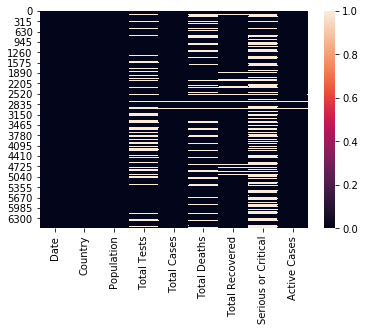

In [16]:
sns.heatmap(df.isnull())

In [17]:
#filling the null values

In [18]:
df['Total Cases']=df['Total Cases'].fillna(df['Total Cases'].mean())

In [19]:
df['Total Tests']=df['Total Tests'].fillna(df['Total Tests'].mean())

In [20]:
df['Total Deaths']=df['Total Deaths'].fillna(df['Total Deaths'].mean())

In [21]:
df['Total Recovered']=df['Total Recovered'].fillna(df['Total Recovered'].mean())

In [22]:
df['Serious or Critical']=df['Serious or Critical'].fillna(df['Serious or Critical'].mean())

In [23]:
df['Active Cases']=df['Active Cases'].fillna(df['Active Cases'].mean())

In [24]:
df.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   int32  
 1   Country              6603 non-null   int32  
 2   Population           6603 non-null   int64  
 3   Total Tests          6603 non-null   float64
 4   Total Cases          6603 non-null   float64
 5   Total Deaths         6603 non-null   float64
 6   Total Recovered      6603 non-null   float64
 7   Serious or Critical  6603 non-null   float64
 8   Active Cases         6603 non-null   float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 412.8 KB


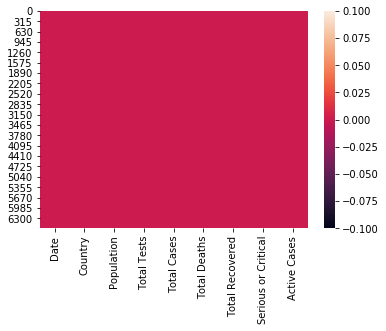

In [26]:
sns.heatmap(df.isna())

In [27]:
df.describe()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6603.000000,6603.000000,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,15.000000,106.000000,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,8.944949,61.491783,1.411537e+08,6.934856e+05,8.828521e+04,5990.992214,22955.519135,1309.473245,6.511732e+04
min,0.000000,0.000000,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,7.000000,53.000000,8.672680e+05,4.733000e+03,8.000000e+01,8.000000,29.000000,7.000000,2.700000e+01
50%,15.000000,106.000000,6.859926e+06,5.419500e+04,6.320000e+02,55.000000,253.000000,137.000000,2.840000e+02
75%,23.000000,159.000000,2.546422e+07,2.167252e+05,5.222500e+03,1416.252096,1786.500000,386.748360,2.230500e+03
max,30.000000,212.000000,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


From the above we can see that outliers is present in the dataset as the values are deviating from 3rd quartile to max value and also the data is skewed as mean is greater than median and vice versa

In [28]:
#data visualisation

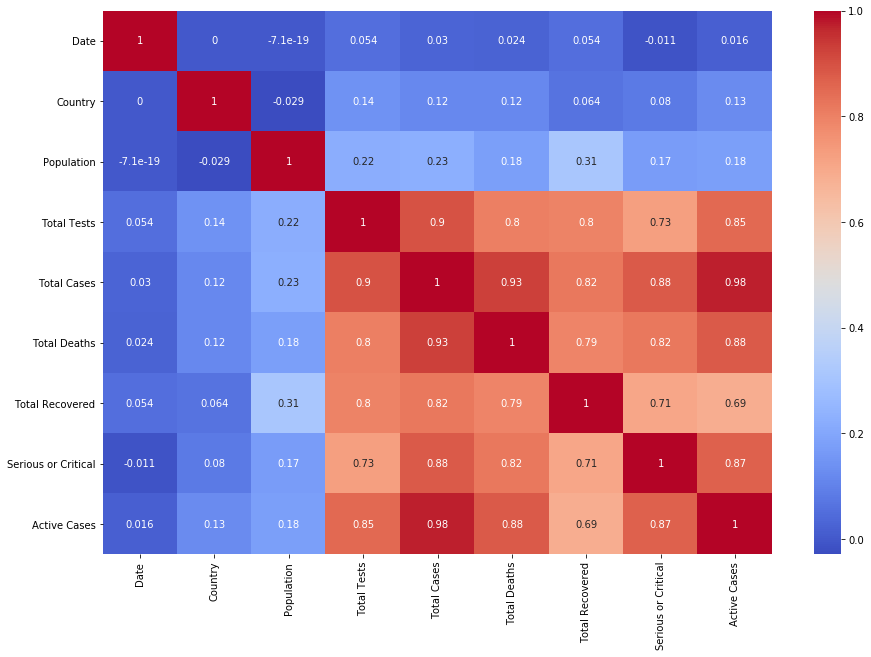

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [30]:
#from the above we can see that most of the values are positively corrrelated amongst each other

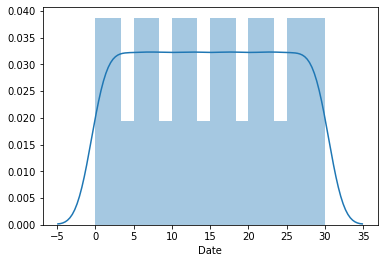

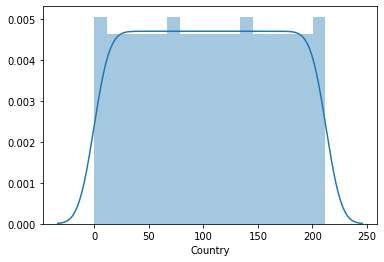

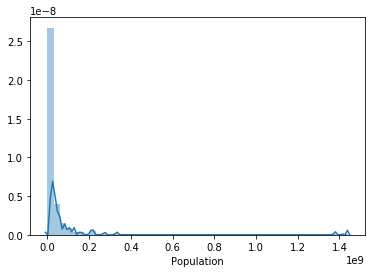

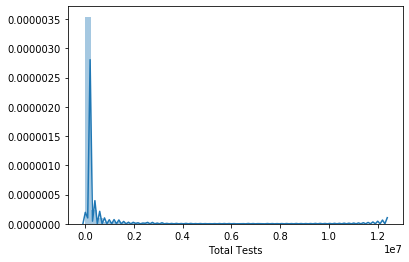

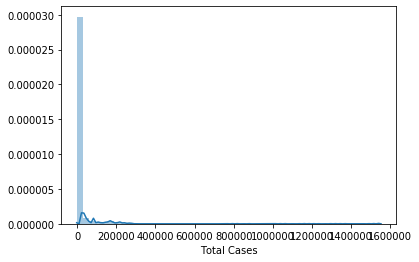

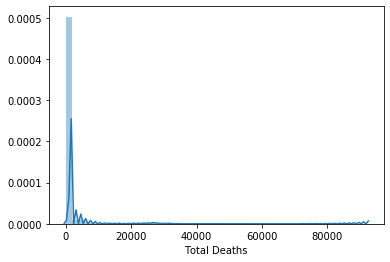

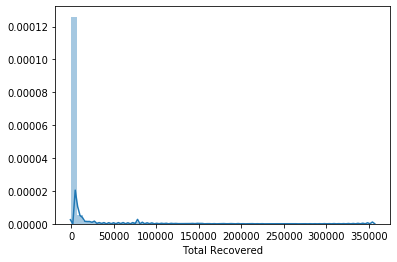

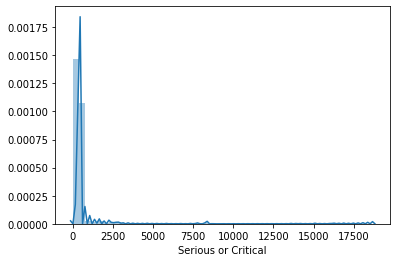

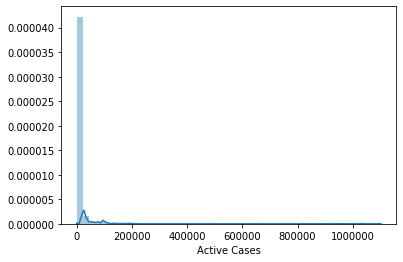

In [31]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

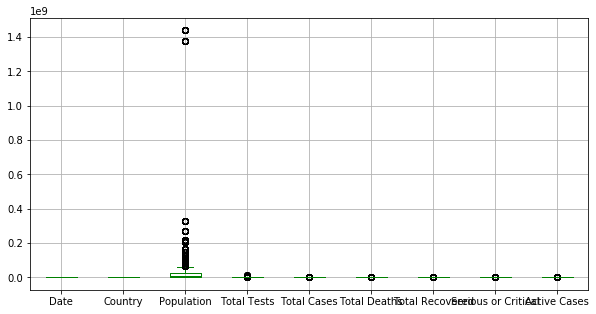

In [32]:
df.boxplot(figsize=(10,5),color='green')      #shows outliers

Text(0, 0.5, 'Active cases')

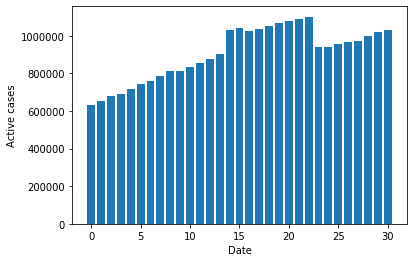

In [33]:
plt.bar(df['Date'],df['Active Cases'])
plt.xlabel('Date')
plt.ylabel('Active cases')

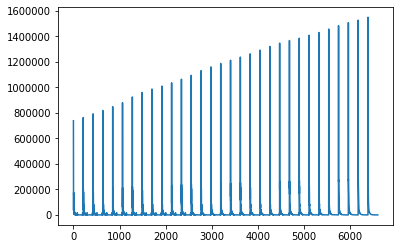

In [34]:
plt.plot(df['Total Cases'])

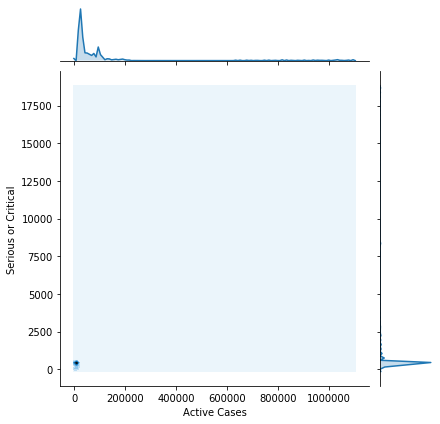

In [35]:
sns.jointplot(df['Active Cases'],df["Serious or Critical"],kind="kde")
plt.show()

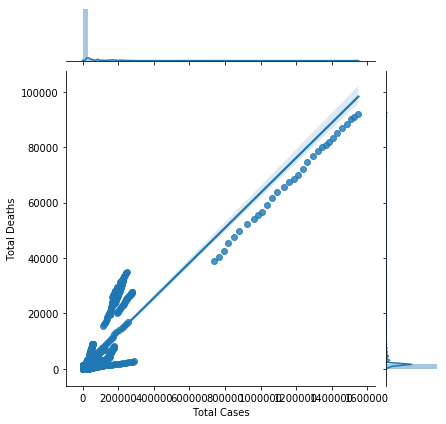

In [36]:
sns.jointplot(df["Total Cases"],df["Total Deaths"],kind="reg")
plt.show()

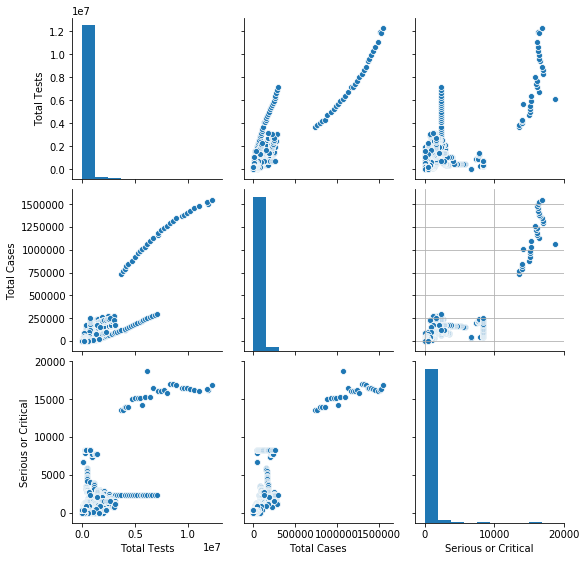

In [37]:
sns.pairplot(df[['Total Tests','Total Cases','Serious or Critical']])
plt.grid()

In [38]:
#removing the outliers

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))

In [41]:
threshold=3
print(np.where(z>3))

(array([   0,    0,    0,    0,    0,    2,    2,    2,    3,    5,    6,
          7,   10,   12,   12,  213,  213,  213,  213,  213,  215,  215,
        215,  216,  218,  219,  219,  220,  223,  225,  225,  426,  426,
        426,  426,  426,  428,  428,  428,  429,  431,  432,  432,  433,
        436,  438,  438,  639,  639,  639,  639,  639,  639,  641,  641,
        641,  642,  644,  645,  645,  646,  649,  651,  651,  852,  852,
        852,  852,  852,  852,  854,  854,  854,  855,  857,  858,  858,
        859,  862,  864,  864, 1065, 1065, 1065, 1065, 1065, 1065, 1066,
       1067, 1067, 1067, 1068, 1070, 1071, 1071, 1072, 1075, 1077, 1077,
       1278, 1278, 1278, 1278, 1278, 1278, 1279, 1280, 1280, 1280, 1281,
       1282, 1283, 1284, 1284, 1285, 1288, 1290, 1290, 1491, 1491, 1491,
       1491, 1491, 1491, 1492, 1493, 1493, 1493, 1494, 1495, 1496, 1497,
       1497, 1498, 1501, 1503, 1503, 1704, 1704, 1704, 1704, 1704, 1704,
       1705, 1706, 1706, 1706, 1707, 1708, 1709, 1

In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
df_new.shape   #shape of the df after removing outliers

(6272, 9)

In [44]:
df.shape  #original shape of the dataset

(6603, 9)

In [46]:
#splitting the dataset in x and y

In [47]:
x=df.drop('Total Deaths',axis=1)

In [48]:
y=df['Total Deaths'].values
y=y.reshape(-1,1)

In [50]:
x.shape

(6603, 8)

In [51]:
y.shape

(6603, 1)

In [45]:
#now we will use scaling technique to standardize the dataset

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std=StandardScaler()

In [54]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)

In [55]:
x.head()

,0,1,2,3,4,5,6,7
0,-1.677051,1.545039,2.085796,5.055167,8.177100,2.719098,10.053851,9.545723
1,-1.677051,0.845705,0.776150,2.329233,0.225007,-0.121916,-0.289259,0.360283
2,-1.677051,1.203504,0.073497,1.028946,2.010527,3.003495,5.334038,1.376264
3,-1.677051,-1.301085,1.246975,-0.221709,0.224203,0.355958,4.771174,0.159276
4,-1.677051,1.528775,0.222931,0.351457,1.102050,0.000000,0.895276,1.358341


In [56]:
y=std.fit_transform(y)
y=pd.DataFrame(data=y)

In [59]:
#now with the help of linear regression we will build our model and check the accuracy

In [60]:
#importing all required libraries

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.9187743835355601
the r2 score corrosponding to the random state 43 is: 0.8836972743619967
the r2 score corrosponding to the random state 44 is: 0.9215283084980004
the r2 score corrosponding to the random state 45 is: 0.8569620991460847
the r2 score corrosponding to the random state 46 is: 0.8862873044440804
the r2 score corrosponding to the random state 47 is: 0.8740523720581845
the r2 score corrosponding to the random state 48 is: 0.9098084556690061
the r2 score corrosponding to the random state 49 is: 0.8894514983986809
the r2 score corrosponding to the random state 50 is: 0.9242641909613265
the r2 score corrosponding to the random state 51 is: 0.8926212205928402
the r2 score corrosponding to the random state 52 is: 0.9042985394708409
the r2 score corrosponding to the random state 53 is: 0.9066329819209634
the r2 score corrosponding to the random state 54 is: 0.9187821282204475
the r2 score corrosponding to the random state 55 i

From the above we can see that our linear regressor model is predicting with accuracy of 94% at a random state of 65.
will also check with other models too, whether the accuracy remains same or not.

In [134]:
x_train.shape

(5282, 8)

In [135]:
y_train.shape

(5282, 1)

In [136]:
x_test.shape

(1321, 8)

In [137]:
y_test.shape

(1321, 1)

In [63]:
lr.coef_

array([[-0.00677677,  0.01277081, -0.0472398 , -0.19065799,  3.5446637 ,
        -0.53861944, -0.01371595, -2.01348083]])

In [64]:
lr.intercept_

array([0.00195948])

In [65]:
from math import sqrt
print(sqrt(mean_absolute_error(y_test,pred)))   #rms error

0.3910998591256366


In [66]:
print(mean_absolute_error(y_test,pred))

0.1529590998080928


In [67]:
#performing regularisation by finding the best hyper parameter

In [68]:
from sklearn.linear_model import Lasso,Ridge

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
ls=Lasso()
rg=Ridge()

In [71]:
params={'alpha':[1.0,0.1,0.01,0.001]}

In [72]:
gd=GridSearchCV(estimator=ls,param_grid=params)
gd1=GridSearchCV(estimator=rg,param_grid=params)

In [73]:
gd.fit(x,y)
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
gd.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
gd1.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
gd1.best_score_

0.8269002940903449

In [77]:
gd.best_score_

0.888007163951184

In [78]:
#using cross valid score

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
score=cross_val_score(lr,x,y,cv=5)

In [81]:
score

array([ 0.88887949,  0.9051446 ,  0.90556576,  0.91010876, -0.29463876])

In [82]:
#so the cross valid is giving a max of 91% accuracy 

In [83]:
#checking the r2 scores with other models

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [85]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.9947464824308763
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.048283876748989145
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.007614682740406823
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.7363296915534304
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.1444612196001192
SVR(C=1.0,

In [118]:
#so from the above we can infer that we are getting the maximum r2 score 99.8% with Decisiontree Regressor 

In [92]:
#find r2 scores at different n_neighbors for KNN

In [112]:
for i in range(2,22):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print("r2 score at neighbor",i,"is:",r2_score(y_test,pred))

r2 score at neighbor 2 is: 0.9961261043006714
r2 score at neighbor 3 is: 0.9966956940612458
r2 score at neighbor 4 is: 0.995713510614847
r2 score at neighbor 5 is: 0.9947464824308763
r2 score at neighbor 6 is: 0.992975325751944
r2 score at neighbor 7 is: 0.9909879202806244
r2 score at neighbor 8 is: 0.9888418951485503
r2 score at neighbor 9 is: 0.9864185641408496
r2 score at neighbor 10 is: 0.9831304841570526
r2 score at neighbor 11 is: 0.9803989845514144
r2 score at neighbor 12 is: 0.9762531128867374
r2 score at neighbor 13 is: 0.972178883448455
r2 score at neighbor 14 is: 0.9690906389361585
r2 score at neighbor 15 is: 0.9643596122171478
r2 score at neighbor 16 is: 0.9599496507513257
r2 score at neighbor 17 is: 0.9550788664911525
r2 score at neighbor 18 is: 0.949540732388033
r2 score at neighbor 19 is: 0.9429146276529076
r2 score at neighbor 20 is: 0.936520627171116
r2 score at neighbor 21 is: 0.9257291739986351


In [94]:
#knn is giving a max of 99.6% r2 score at n_neighbors=3

In [95]:
# using ensemble techniques

In [113]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [114]:
a=AdaBoostRegressor(n_estimators=150,learning_rate=0.01)
a.fit(x_train,y_train)
predad=a.predict(x_test)
print("r2 score is:",r2_score(y_test,predad))

r2 score is: 0.9745179545348088


In [117]:
#from the above we can see that adaboost model is giving r2 score of 97%

In [115]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.99274400735021
r2 score at lerning rate 0.01 is: 0.8391489130121615
r2 score at lerning rate 1.0 is: 0.9668518685523844


In [101]:
#gradient boost regressor is giving a max of 99.2% r2 score at l_rate of 0.1

In [116]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.9982945967190381
r2 score at 200 is: 0.9978885989493224
r2 score at 250 is: 0.9980698704670231
r2 score at 300 is: 0.9978868495388826
r2 score at 350 is: 0.99778587852789


In [103]:
#from the below DataFrame we will choose our model as final

In [119]:
a={'model':('lin reg','knn','svr','dtr','adaboostreg','gdboostreg','rdboost'),'r2_score in %':[94,99.6,73,99.8,97,99,99.82]}

In [120]:
results=pd.DataFrame(data=a)

In [121]:
results

,model,r2_score in %
0,lin reg,93.00
1,knn,99.60
2,svr,73.00
3,dtr,99.80
4,adaboostreg,97.00
5,gdboostreg,99.00
6,rdboost,99.82


In [138]:
#from the above we will select Decisiontree regressor as our final model for prediction and will dump the same 
#using serialisation.

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=65,test_size=0.20)

In [127]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
a1=pd.DataFrame(data=preddtr)
a1.to_csv('world_covid19_dtr.csv')   #saved the predicted result in csv format

In [128]:
r2_score(y_test,preddtr)

0.9984173391095247

In [130]:
from math import sqrt
print(sqrt(mean_squared_error(y_test,preddtr)) )  #root mean square error

0.2191948461099551


In [131]:
mean_absolute_error(y_test,preddtr)

0.03520005055217709

In [129]:
#dumping the final model for prediction

In [132]:
from sklearn.externals import joblib

In [133]:
joblib.dump(dtr,'world_covid19.obj')

['world_covid19.obj']